In [242]:
#!/usr/bin/env python
import glob
import math
import os
import re
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

In [243]:
# define functions:

# Function to calculate the mean from a string containing space separated numbers.
def calculate_mean(numbers_str):
    numbers = [float(x) for x in numbers_str.split()]
    mean = sum(numbers) / len(numbers)
    return mean

# Function to check if a value can be converted to a float.
def is_float(string: any) -> bool:
    if string is None:
        return False
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract all properties from an sdf file. (takes regex paths as input) 
def extract_properties_from_sdf(pathname):
    if not os.path.isfile(pathname):
        print("ERROR: file '%s' is missing!" % pathname)
        quit(1)
    pattern = re.compile("^> *<.*>$")
    all_values = {}
    with open(pathname, "r") as input_file:
        lines = input_file.readlines()
        for index, line in enumerate(lines):
            if pattern.match(line):
                property_name = re.split('<|>', line)[2]
                value_str = lines[index + 1].rstrip()
                if is_float(value_str):
                    all_values[property_name] = float(value_str)
                else:
                    all_values[property_name] = value_str
    return all_values



In [244]:
# Collect paths to all the sdf files of test set 1 in 'pathnames' variable.
# This will assume that the Jupyter-notebook is opened from within the directory in which it is contained.
pathnames = []
regex = str(os.getcwd()+"/../../test/test_set_1/*/*_out.sdf").strip('\'')
pathnames.extend(sorted(glob.glob(regex)))


In [245]:
# store paths to catalyst groups (AF) in separate variables
H0_paths = []; HI_paths = []; HIIprime_paths = []; HII_paths = []; HC1Ph_paths = []
for pathname in pathnames:
    if "H0_" in pathname:
        H0_paths.append(pathname)
    if "HI_" in pathname:
        HI_paths.append(pathname)    
    if "HIIprime_" in pathname:
        HIIprime_paths.append(pathname)
    if "HII_" in pathname:
        HII_paths.append(pathname)
    if "HC1Ph_" in pathname:
        HC1Ph_paths.append(pathname)
        
print("Total number of AF Candidates = " + str(len(H0_paths + HI_paths + HIIprime_paths + HII_paths + HC1Ph_paths)))

Total number of AF Candidates = 30


In [246]:
# Now we calculate the mean of selected sdf properties (energies, descriptor, weights etc.) within each catalyst group.
# The mean values are then stored in separate arrays for further use bellow.
# Finally, we print a simple overview of the fitness, descriptors and weights.

# define arrays containing catalyst groups paths and names.
catalyst_groups = [H0_paths, HI_paths, HIIprime_paths, HII_paths, HC1Ph_paths]
catalyst_name = ['H0', 'HI', 'HIIprime', 'HII', 'HC1Ph']
# All arrays that contains values derived from the set complete of catalyst (test set 1) 
# will adhear to the index above (arr[0] = H0 value, arr[1] = HI value ... ) 

# define arrays containing desired properties (averages).
fitnesses = []; d1s = []; d2s = []; d3s = []; w1s = []; w2s = []; w3s = []; w4s = []
AFenergyA = []; AFenergyE = []; AFenergyF = []; AFenergyC = []; AFenergyD = []; AFenergyX = []; AFenergyZ = []; AFenergyL = []

# define array containing desired properties (standard deviations).
fitnessStds = []; d1Stds = []; d2Stds = []; d3Stds = []; w1Stds = []; w2Stds = []; w3Stds = []; w4Stds = []
AFenergyA_std = []; AFenergyD_std = []; AFenergyX_std = []; AFenergyZ_std = []

# Loop over each catalyst group to extract mean values and standardard deviations. 
i = 0
for group in catalyst_groups:
    rows = []
    for candidate in group:
        rows.append(extract_properties_from_sdf(candidate))
        
    # Definte pandas datafram with all extracted properties, from all candidates.
    df = pd.DataFrame(rows)

    # colelct mean values from descriptors and weights.
    fitness = str(df.agg({'FITNESS': ['mean']})).split()[2]; fitnesses.append(fitness)
    fitnessStd = str(df.agg({'FITNESS': ['std']})).split()[2]
    print('Fitness: ' + str(round(float(fitness), 2)) + ' (St.dev: ' + str(round(float(fitnessStd), 2)) + ')')
    d1 = str(df.agg({'DESCRIPTOR_1': ['mean']})).split()[2]; d1s.append(d1)
    d2 = str(df.agg({'DESCRIPTOR_2': ['mean']})).split()[2]; d2s.append(d2)
    d3 = str(df.agg({'DESCRIPTOR_3': ['mean']})).split()[2]; d3s.append(d3)
    w1 = str(df.agg({'WEIGHT_1': ['mean']})).split()[2]; w1s.append(w1)
    w2 = str(df.agg({'WEIGHT_2': ['mean']})).split()[2]; w2s.append(w2)
    w3 = str(df.agg({'WEIGHT_3': ['mean']})).split()[2]; w3s.append(w3)
    w4 = str(df.agg({'WEIGHT_4': ['mean']})).split()[2]; w4s.append(w4)

    #collect standard deviations from descriptors and weights.
    d1Stds.append(float(str(df.agg({'DESCRIPTOR_1': ['std']})).split()[2]))
    d2Stds.append(float(str(df.agg({'DESCRIPTOR_2': ['std']})).split()[2]))
    d3Stds.append(float(str(df.agg({'DESCRIPTOR_3': ['std']})).split()[2]))
    w1Stds.append(float(str(df.agg({'WEIGHT_1': ['std']})).split()[2]))
    w2Stds.append(float(str(df.agg({'WEIGHT_2': ['std']})).split()[2]))
    w3Stds.append(float(str(df.agg({'WEIGHT_3': ['std']})).split()[2]))
    w4Stds.append(float(str(df.agg({'WEIGHT_4': ['std']})).split()[2]))

    #collect mean values from potential energies.
    AFenergyA.append(float(str(df.agg({'freeEnergyA': ['mean']})).split()[2]))
    AFenergyE.append(float(str(df.agg({'freeEnergyE': ['mean']})).split()[2]))
    AFenergyF.append(float(str(df.agg({'freeEnergyF': ['mean']})).split()[2]))
    AFenergyC.append(float(str(df.agg({'freeEnergyC': ['mean']})).split()[2]))
    AFenergyD.append(float(str(df.agg({'freeEnergyD': ['mean']})).split()[2]))
    AFenergyX.append(float(str(df.agg({'freeEnergyX': ['mean']})).split()[2]))
    AFenergyZ.append(float(str(df.agg({'freeEnergyZ': ['mean']})).split()[2]))
    AFenergyL.append(float(str(df.agg({'freeEnergyL': ['mean']})).split()[2]))

    AFenergyD_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyA_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyX_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    AFenergyZ_std.append(float(str(df.agg({'freeEnergyA': ['std']})).split()[2]))
    
    # print overview.
    print(f"candidate: {catalyst_name[i]}")
    print('D1: ' + str(round(float(d1), 2)))
    print('D2: ' + str(round(float(d2), 2)))
    print('D3: ' + str(round(float(d3), 2)))
    print('w1: ' + str(round(float(w1), 2)))
    print('w2: ' + str(round(float(w2), 2)))
    print('w3: ' + str(round(float(w3), 2)))
    print('w4: ' + str(round(float(w4), 2)))

    i = i + 1
    
# Exract individual energies from each catalyst group
patterns = ["> <freeEnergyA>", "> <freeEnergyF>", "> <freeEnergyE>", "> <freeEnergyC>", "> <freeEnergyD>","> <freeEnergyL>", "> <freeEnergyX>", "> <freeEnergyZ>"]
AF_EnergyA = []; AF_EnergyF = []; AF_EnergyE = []; AF_EnergyC = []; AF_EnergyD = []; AF_EnergyL = []; AF_EnergyX = []; AF_EnergyZ = []
AF_Energies = [AF_EnergyA, AF_EnergyF, AF_EnergyE, AF_EnergyC, AF_EnergyD, AF_EnergyL, AF_EnergyX, AF_EnergyZ]

for group in catalyst_groups:
    for pathname in group:
        i = 0
        with open(pathname, "r") as input_file:
            lines = input_file.readlines()
            for pattern in patterns:
                for index, line in enumerate(lines):
                #for pattern in patterns:
                    pattern = re.compile(pattern)
                    if pattern.match(line):
                        property_name = re.split('<|>', line)[2]
                        value_str = lines[index + 1].rstrip()
                        if is_float(value_str):
                            AF_Energies[i].append(float(value_str))
                            i = i + 1
    

Fitness: 0.0 (St.dev: 0.0)
candidate: H0
D1: 0.0
D2: 1.47
D3: 2.66
w1: 1.0
w2: 0.0
w3: 0.04
w4: 1.0
Fitness: 3.45 (St.dev: 1.71)
candidate: HI
D1: 0.0
D2: 5.17
D3: 0.21
w1: 1.0
w2: 0.69
w3: 0.9
w4: 1.0
Fitness: 13.66 (St.dev: 0.01)
candidate: HIIprime
D1: 0.23
D2: 13.05
D3: 0.38
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 14.95 (St.dev: 0.02)
candidate: HII
D1: 1.0
D2: 13.95
D3: 0.0
w1: 1.0
w2: 1.0
w3: 1.0
w4: 1.0
Fitness: 19.91 (St.dev: 6.86)
candidate: HC1Ph
D1: 5.87
D2: 14.54
D3: 0.0
w1: 0.98
w2: 1.0
w3: 1.0
w4: 1.0


In [247]:
# Calculate barriers from AF values

# Constant energies
E_propene=-117.738020895
E_ethene=-78.4716324751
E_Hoveyda=-502.204109499
hartree_to_kcalmol=627.49467516

AF_BarriersBHE_from_precursor = [] # Barriers to B-HE with respect to the precursor 
AF_BarriersMetathesis_from_precursor = [] # Barriers to metathesis with respect to the precursor
AF_BarriersBHE_from_MCB = [] # Barriers to B-HE with respect to the MCB 
AF_BarriersMetathesis_from_MCB = [] # Barriers to metathesis with respect to the MCB

i = 0
while i < len(AFenergyA):


    # Calculate barriers to B-H elimination wrt. MCB:
    AF_BHE_MCB = (AFenergyZ[i] - AFenergyD[i]) * hartree_to_kcalmol
    AF_BarriersBHE_from_MCB.append(AF_BHE_MCB)
        
    # Calculate barriers to metathesis wrt. MCB:
    AF_Metathesis_MCB = (AFenergyX[i] + (2 * E_ethene) - AFenergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_BarriersMetathesis_from_MCB.append(AF_Metathesis_MCB)
    i = i + 1

# Calculate metathesis/B-H elim. barriers from AF energy values
AF_H0_BH_bar=[]; AF_HI_BH_bar=[]; AF_HIIprime_BH_bar=[]; AF_HII_BH_bar=[]; AF_HC1Ph_BH_bar=[]
AF_H0_met_bar=[]; AF_HI_met_bar=[]; AF_HIIprime_met_bar=[]; AF_HII_met_bar=[]; AF_HC1Ph_met_bar=[]

i = 0
while i < 6:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_H0_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_H0_met_bar.append(met_bar)
    i = i + 1

while i < 12:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HI_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HI_met_bar.append(met_bar)
    i = i + 1

while i < 18:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HIIprime_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HIIprime_met_bar.append(met_bar)
    i = i + 1

while i < 24:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HII_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HII_met_bar.append(met_bar)
    i = i + 1

while i < 30:
    # Calculate barriers to B-H elimination wrt. MCB:
    BH_bar = (AF_EnergyZ[i] - AF_EnergyD[i]) * hartree_to_kcalmol
    AF_HC1Ph_BH_bar.append(BH_bar)
    # Calculate barriers to metathesis wrt. MCB:
    met_bar = (AF_EnergyX[i] + (2 * E_ethene) - AF_EnergyD[i] - (2 * E_propene)) * hartree_to_kcalmol
    AF_HC1Ph_met_bar.append(met_bar)
    i = i + 1 


In [248]:
# Extract energies from HQF.

HQF_paths = []
sorted_HQF_names = ['H0HQF', 'HIHQF', 'HIIprimeHQF', 'HIIHQF', 'HC1PhHQF']
sorted_HQF_paths = []

for pathname in pathnames:
    for name in sorted_HQF_names:
        if pathname in name or name in pathname:
            HQF_paths.append(pathname)
for name in sorted_HQF_names:
    for path in HQF_paths:
        if name in path:
            sorted_HQF_paths.append(path) 

patterns = ["> <freeEnergyA>", "> <freeEnergyF>", "> <freeEnergyE>", "> <freeEnergyC>","> <freeEnergyL>", "> <freeEnergyX>", "> <freeEnergyZ>"]
HQFfreeEnergyA = []; HQFfreeEnergyF = []; HQFfreeEnergyE = []; HQFfreeEnergyC = []; HQFfreeEnergyL = []; HQFfreeEnergyX = []; HQFfreeEnergyZ = []
HQFfreeEnergies= [HQFfreeEnergyA, HQFfreeEnergyF, HQFfreeEnergyE, HQFfreeEnergyC, HQFfreeEnergyL, HQFfreeEnergyX, HQFfreeEnergyZ]

for pathname in sorted_HQF_paths:
    i = 0
    with open(pathname, "r") as input_file:
            lines = input_file.readlines()
            for index, line in enumerate(lines):
                for pattern in patterns:
                    pattern = re.compile(pattern)
                    if pattern.match(line):
                        property_name = re.split('<|>', line)[2]
                        value_str = lines[index + 1].rstrip()
                        if is_float(value_str):
                            HQFfreeEnergies[i].append(float(value_str))
                            i = i + 1

In [249]:
# Calculating barriers from HQF energies, then calculate the descriptors, weights and overall fitness.

# Defining variables
BarriersBHE_from_precursor = [] # Barriers to B-HE with respect to the precursor 
BarriersMetathesis_from_precursor = [] # Barriers to metathesis with respect to the precursor
BarriersBHE_from_MCB = [] # Barriers to B-HE with respect to the MCB 
BarriersMetathesis_from_MCB = [] # Barriers to metathesis with respect to the MCB
HQF_fitnesses = []; HQFd1s = []; HQFd2s = []; HQFd3s = []; HQFw1s = []; HQFw2s = []; HQFw3s = []; HQFw4s = []
ddE_stability_HI = hartree_to_kcalmol * math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[1] + HQFfreeEnergyA[1])
# Defining constants (free energies [hartree] of substrates, conversion factors etc.)
G_ethene = -78.477866552
G_propene = -117.734910132
G_Hoveyda = -502.210801644
hartree_to_kcalmol = 627.4946752
kT = 0.622308995 # NB: in Kcal/mol
epsilon = 5.73163236
delta = 1.43290809
Lambda = 1.43290809
sigma = 2.86581618

i = 0
# Check for inconsistancies in the data set
if not len(HQFfreeEnergyA) == len(HQFfreeEnergyF) == len(HQFfreeEnergyE) == len(HQFfreeEnergyC) == len(HQFfreeEnergyX) == len(HQFfreeEnergyZ) == len(HQFfreeEnergyL):
    print('Error: inconsistant number of energy values')
    quit(1)
else:
    while i < len(HQFfreeEnergyA):
        # Calculate barriers to B-H elimination wrt. precursor:
        BHE_P = ((HQFfreeEnergyZ[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_ethene))) * hartree_to_kcalmol
        BarriersBHE_from_precursor.append(BHE_P)
        
        # Calculate barriers to metathesis wrt. precursor:
        Metathesis_P = ((HQFfreeEnergyX[i] + G_Hoveyda) - (HQFfreeEnergyA[i] + (2 * G_propene))) * hartree_to_kcalmol
        BarriersMetathesis_from_precursor.append(Metathesis_P)

        # Calculate barriers to B-H elimination wrt. MCB:
        BHE_MCB = (HQFfreeEnergyZ[i] - HQFfreeEnergyC[i]) * hartree_to_kcalmol
        BarriersBHE_from_MCB.append(BHE_MCB)
        
        # Calculate barriers to metathesis wrt. MCB:
        Metathesis_MCB = (HQFfreeEnergyX[i] + (2 * G_ethene) - HQFfreeEnergyC[i] - (2 * G_propene)) * hartree_to_kcalmol
        BarriersMetathesis_from_MCB.append(Metathesis_MCB)
        i = i + 1

i = 0        
while i < len(HQFfreeEnergyA):
    # Calculate descriptor 1 (d1) values:
    HQFd1 = math.exp((( BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i] ) - ( BarriersBHE_from_MCB[3] - BarriersMetathesis_from_MCB[3] )) / kT )
    HQFd1s.append(HQFd1)

    # Calculate descriptor 2 (d2) values:
    HQFd2 = BarriersBHE_from_MCB[i] - BarriersMetathesis_from_MCB[i]
    HQFd2s.append(HQFd2)

    # Calculate descriptor 3 (d3) values:
    if BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i] > 0:
        HQFd3 = BarriersMetathesis_from_MCB[3] - BarriersMetathesis_from_MCB[i]
        HQFd3s.append(HQFd3)
    else:
        HQFd3 = 0.0
        HQFd3s.append(HQFd3)

    # calculate weight 1 (w1) values:
    HQFw1 = 1 / (1 + math.exp((BarriersMetathesis_from_MCB[i] - (BarriersMetathesis_from_MCB[3] + epsilon) ) / kT))
    HQFw1s.append(HQFw1)

    # calculate weight 2 (w2) values:
    HQFw2 = 1 / (1 + math.exp(((hartree_to_kcalmol * (math.fabs(HQFfreeEnergyC[3] - HQFfreeEnergyA[3] - HQFfreeEnergyC[i] + HQFfreeEnergyA[i])) - (ddE_stability_HI + delta)) / kT)))
    HQFw2s.append(HQFw2)

    # calculate weight 3 (w3) values:
    dE_synt = hartree_to_kcalmol * (HQFfreeEnergyA[i] + HQFfreeEnergyL[1] - HQFfreeEnergyA[1] - HQFfreeEnergyL[i])
    HQFw3 = 1 / (1 + math.exp((dE_synt - Lambda) / kT))
    HQFw3s.append(HQFw3)

    # calculate weight 4 (w4) values:
    dE_stereo = hartree_to_kcalmol * (HQFfreeEnergyF[i] - HQFfreeEnergyA[i])
    HQFw4 = 1 / (1 + math.exp((sigma - dE_stereo) / kT))
    HQFw4s.append(HQFw4)

    HQF_fitness = (HQFd1 + HQFd2 + HQFd3) * HQFw1 * HQFw2 * HQFw3 * HQFw4
    HQF_fitnesses.append(HQF_fitness)
                 
    i = i + 1

HQF_descriptors = [HQFd1s, HQFd2s, HQFd3s, HQFw1s, HQFw2s, HQFw3s, HQFw4s, HQF_fitnesses]
r_HQFd1s='';r_HQFd2s='';r_HQFd3s='';r_HQFw1s='';r_HQFw2s='';r_HQFw3s='';r_HQFw4s='';r_HQF_fitnesses=''
rounded_HQF_descriptors = [r_HQFd1s, r_HQFd2s, r_HQFd3s, r_HQFw1s, r_HQFw2s, r_HQFw3s, r_HQFw4s, r_HQF_fitnesses]
i = 0
for desc in HQF_descriptors:
    rounded_HQF_descriptors[i] = [ round(elem, 1) for elem in desc ]; i = i + 1

# Printing HQF descriptor/weights overview.
print('property  H0   HI   HII\' HII  HC1Ph')
print('d1:      '+str(rounded_HQF_descriptors[0]))
print('d2:      '+str(rounded_HQF_descriptors[1]))
print('d3:      '+str(rounded_HQF_descriptors[2]))
print('w1:      '+str(rounded_HQF_descriptors[3]))
print('w2:      '+str(rounded_HQF_descriptors[4]))
print('w3:      '+str(rounded_HQF_descriptors[5]))
print('w4:      '+str(rounded_HQF_descriptors[6]))
print('Fitness: '+str(rounded_HQF_descriptors[7]))




property  H0   HI   HII' HII  HC1Ph
d1:      [0.0, 0.0, 0.2, 1.0, 12.8]
d2:      [4.4, 4.8, 11.1, 12.0, 13.6]
d3:      [3.2, 1.2, 0.5, 0.0, 0.0]
w1:      [1.0, 1.0, 1.0, 1.0, 1.0]
w2:      [0.0, 0.9, 1.0, 1.0, 1.0]
w3:      [0.6, 0.9, 1.0, 1.0, 1.0]
w4:      [1.0, 1.0, 1.0, 1.0, 1.0]
Fitness: [0.0, 5.0, 11.9, 13.0, 26.4]


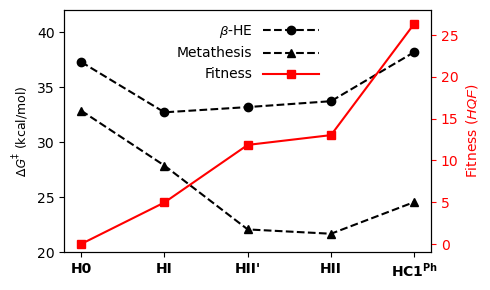

In [250]:
import warnings
warnings.filterwarnings('ignore')

# Changing font to stix; setting specialized math font properties as directly as possible
plt.rcParams['font.size'] = 10
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
catalyst = ["H0", "HI", "HII'", "HII", "$\mathbf{HC1^{Ph}}$"]
fig, ax = subplots(figsize=(5,3))

# Plotting on the primary y-axis
ax.plot(catalyst, BarriersBHE_from_precursor, linestyle='dashed', marker='o', color='black', label='$\\beta$-HE')
ax.plot(catalyst, BarriersMetathesis_from_precursor, linestyle='dashed', marker='^', markerfacecolor='black', color='black', label='Metathesis')
ax.set_xlabel('')
ax.set_ylabel("$\Delta G^{\u2021}$ (kcal/mol)", fontsize=9)

# Creating a secondary y-axis
ax2 = ax.twinx()
ax2.plot(catalyst[0:], HQF_fitnesses[0:], color='red', label='HQF_fitnesses', marker='s', markerfacecolor='red')
ax2.set_ylabel('Fitness ($\mathit{HQF}$)', color='red')

handels = [
    Line2D([0], [0], linestyle='dashed', marker='o', markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='dashed', marker='^', markerfacecolor='black', color='black'),
    Line2D([0], [0], linestyle='solid', marker='s', markerfacecolor='red', color='red')
]

labels = [
    '$\\beta$-HE',
    'Metathesis',
    'Fitness'
]

# Adjust legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
leg = ax.legend(handels, labels, handlelength=4, markerfirst=False, loc='upper center', ncol=1)
leg.get_frame().set_linewidth(0.0)

# set -y-axis limits for the first axis
ax.set_ylim(20, 42)

# Set y-axis limits for the secondary axis
ax2.set_ylim(-1, 28)

# Set the color of the y-axis ticks for the secondary axis
ax2.tick_params(axis='y', colors='red')

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

plt.tight_layout()
#plt.savefig("FitnessEval.svg", format="svg", bbox_inches="tight")
plt.show()

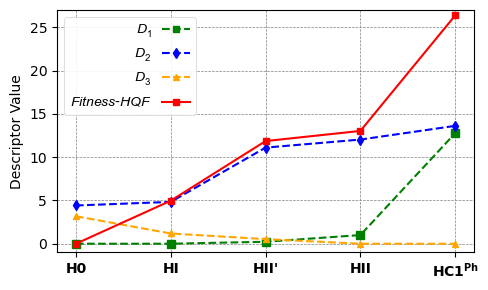

In [251]:
catLabel = catalyst
fig, ax = subplots(figsize=(5,3))

c1='green';c2='blue';c3='orange';c4='cyan';c5='brown';c6='magenta';c7='black';cHQF='red'

# Plotting on the primary y-axis
ax.plot(catLabel, HQFd1s, linestyle='--', marker='s', markersize=6, markerfacecolor=c1, color=c1, label="$\mathit{D_{\mathit{1}-HQF}$")
ax.plot(catLabel, HQFd2s, linestyle='--', marker='d', markersize=5, markerfacecolor=c2, color=c2, label="$\mathit{D_{\mathit{2}-HQF}$")
ax.plot(catLabel, HQFd3s, linestyle='--', marker='^', markersize=5, markerfacecolor=c3, color=c3, label="$\mathit{D_{\mathit{3}-HQF}$")
ax.plot(catLabel, HQF_fitnesses, linestyle='solid', marker='s', markersize=5, markerfacecolor=cHQF, color=cHQF, label="Fitness-$\mathit{HQF}$")
ax.set_xlabel('')
ax.set_ylabel("Descriptor Value", fontsize=10)

# Create a custom legend with the desired order
handles = [
    Line2D([0], [0], linestyle='--', marker='s', markersize=5, markerfacecolor=c1, color=c1),
    Line2D([0], [0], linestyle='--', marker='d', markersize=5, markerfacecolor=c2, color=c2),
    Line2D([0], [0], linestyle='--', marker='^', markersize=5, markerfacecolor=c3, color=c3),
    Line2D([0], [0], linestyle='solid', marker='s', markersize=5, markerfacecolor=cHQF, color=cHQF)
]

# Label names (Lines)
labels = [
    "$\mathit{D_{1}}$",
    "$\mathit{D_{2}}$",
    "$\mathit{D_{3}}$",
    "$\mathit{Fitness}$-$\mathit{HQF}$"
]

# Adjust legend to display over two columns
box = ax.get_position()
leg = ax.legend(handles, labels, markerfirst=False, loc='best', ncol=1, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(0.5)

plt.grid(color='gray',linestyle='--',linewidth=0.5)

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

# set -y-axis limits for the first axis
ax.set_ylim(-1, 27)

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

plt.tight_layout()
show()

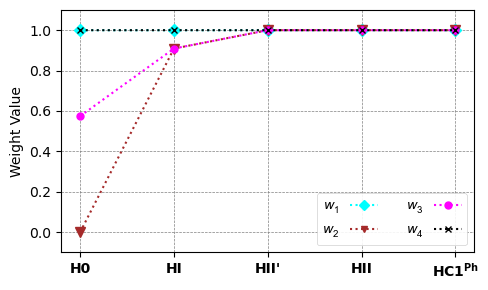

In [252]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

catLabel = catalyst
fig, ax = subplots(figsize=(5,3))

# Plotting on the primary y-axis
ax.plot(catLabel, HQFw1s, linestyle=':', marker='D', markersize=6, markerfacecolor=c4, color=c4, label="$\mathit{w_{\mathit{1}-HQF}$")
ax.plot(catLabel, HQFw2s, linestyle=':', marker='v', markersize=7, markerfacecolor=c5, color=c5, label="$\mathit{w_{\mathit{2}-HQF}$")
ax.plot(catLabel, HQFw3s, linestyle=':', marker='o', markersize=5, markerfacecolor=c6, color=c6, label="$\mathit{w_{\mathit{3}-HQF}$")
ax.plot(catLabel, HQFw4s, linestyle=':', marker='x', markersize=5, markerfacecolor=c6, color=c7, label="$\mathit{w_{\mathit{4}-HQF}$")
ax.set_xlabel('')
ax.set_ylabel("Weight Value", fontsize=10)

# Create a custom legend with the desired order
handles = [
    Line2D([0], [0], linestyle=':', marker='D', markersize=5, markerfacecolor=c4, color=c4),
    Line2D([0], [0], linestyle=':', marker='v', markersize=5, markerfacecolor=c5, color=c5),
    Line2D([0], [0], linestyle=':', marker='o', markersize=5, markerfacecolor=c6, color=c6),
    Line2D([0], [0], linestyle=':', marker='x', markersize=5, markerfacecolor=c7, color=c7)
]

# Label names (Lines)
labels = [
    "$\mathit{w_{1}}$",
    "$\mathit{w_{2}}$",
    "$\mathit{w_{3}}$",
    "$\mathit{w_{4}}$"
]

# Adjust legend to display over two columns
box = ax.get_position()
leg = ax.legend(handles, labels, markerfirst=False, loc='best', ncol=2, frameon=True, framealpha=0.9)
leg.get_frame().set_linewidth(0.5)

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

plt.grid(color='gray',linestyle='--',linewidth=0.5)

# set -y-axis limits for the first axis
ax.set_ylim(-0.1, 1.1)

# Set x-axis ticks to bold and not italic
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontproperties(FontProperties(weight='bold', style='normal'))

plt.tight_layout()
show()

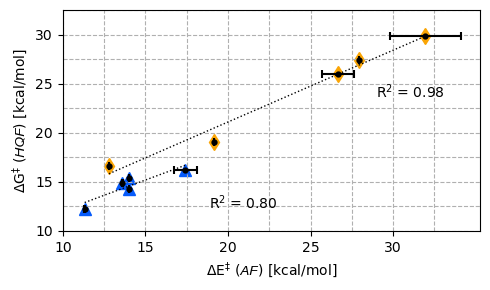

In [253]:
fig, ax = subplots(figsize=(5,3))

# Define data
HQmet = BarriersMetathesis_from_MCB
HQBH = BarriersBHE_from_MCB
AFmet = AF_BarriersMetathesis_from_MCB
AFBH = AF_BarriersBHE_from_MCB

#define data (Sorted from lowest to highest x-value)
#DE Metathesis
x1 = np.array([AFmet[0], AFmet[2], AFmet[1], AFmet[3], AFmet[4]])
y1 = np.array([HQmet[0], HQmet[2], HQmet[1], HQmet[3], HQmet[4]])

#DE B-HE Decomposition
x2 = np.array([AFBH[0], AFBH[1], AFBH[2], AFBH[3], AFBH[4]])
y2 = np.array([HQBH[0], HQBH[1], HQBH[2], HQBH[3], HQBH[4]])

#calculate equation for trendline: Metathesis
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)

#add trendline to plot
plt.plot(x1, p1(x1), color="black", linewidth=1, linestyle="dotted")

#calculate equation for trendline: B-HE
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)

#add trendline to plot
plt.plot(x2, p2(x2), color="black", linewidth=1, linestyle="dotted")

AF_metathesis_barriers=[AF_H0_met_bar, AF_HI_met_bar, AF_HIIprime_met_bar, AF_HII_met_bar, AF_HC1Ph_met_bar]
AF_decomp_barriers=[AF_H0_BH_bar, AF_HI_BH_bar, AF_HIIprime_BH_bar, AF_HII_BH_bar, AF_HC1Ph_BH_bar]

for barrier in AF_metathesis_barriers:
    x_err_metathesis.append(statistics.stdev(barrier))
for barrier in AF_decomp_barriers:
    x_err_decomp.append(statistics.stdev(barrier))

# Define candidate names
candidate_names = ["$\mathbf{H0}$", "$\mathbf{HI}$", "$\mathbf{HII\prime}$", "$\mathbf{HII}$", "$\mathbf{HC1^{Ph}}$"]

EBfmt='.k';csize=3;cthick=1;mwidth=1.5;lwidth=1.5;msize1=8;msize2=8;color1="#055AFA";color2="#FAA505"

# Define markers/error bars for metathesis barriers and put in list
m0='';m1='';m2='';m3='';m4='';
me0='';me1='';me2='';me3='';me4='';
metathesis_markers=[m0, m1, m2, m3, m4]
metathesis_errors=[me0, me1, me2, me3, me4]

i = 0
for error in metathesis_errors:
    error = plt.errorbar(AFmet[i], HQmet[i], xerr=x_err_metathesis[i], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
    metathesis_markers[i] = plt.plot(AFmet[i], HQmet[i], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1, label=candidate_names[i])
    i = i + 1 

# Define markers/error bars for B-H elim. barriers and put in list
bh0='';bh1='';bh2='';bh3='';bh4='';
bhe0='';bhe1='';bhe2='';bhe3='';bhe4='';
decomp_markers=[bh0, bh1, bh2, bh3, bh4]
decomp_errors=[bhe0, bhe1, bhe2, bhe3, bhe4]

i = 0
for error in decomp_errors:
    error = plt.errorbar(AFBH[i], HQBH[i], xerr=x_err_decomp[i], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
    decomp_markers[i] = plt.plot(AFBH[i], HQBH[i], color=color2, linestyle='none', marker='d', markersize=msize1, zorder=1, label=candidate_names[i])
    i = i + 1 
 
# Add labels next to B-HE matkers
#for i, (xi, yi) in enumerate(zip(x2, y2)):
#    xoffset=-17
#    yoffset=5
#    if i==4:
#         yoffset=-18
#         xoffset=-20.5
#    elif i==1:
#         xoffset=5
#    label = f'{candidate_names[i]}'  # You can customize the label as needed
#    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(xoffset,yoffset), ha='left')

# Add labels next to metathesis markers (offset to make clear distinctions)
#for i, (xi, yi) in enumerate(zip(x1, y1)):
#    if i==0:
#         yoffset=-2
#         xoffset=3
#    elif i==1:
#         yoffset=-19
#         xoffset=8
#    elif i==2:
#         yoffset=0
#         xoffset=-28
#    elif i==3:
#         yoffset=3
#         xoffset=3
#    elif i==4:
#         yoffset=0
#         xoffset=4
#    label = f'{candidate_names[i]}' 
#    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(xoffset,yoffset), ha='left')

x_tick_values = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5]
y_tick_values = x_tick_values

# Filter out the tick values that are not integers for both x and y axes
integer_x_tick_values = [value for value in x_tick_values if value == int(value)]
integer_y_tick_values = [value for value in y_tick_values if value == int(value)]

# Set tick labels for integer tick values for both x and y axes
plt.xticks(integer_x_tick_values)
plt.yticks(integer_y_tick_values)

# Set empty string labels for non-integer tick values for both x and y axes
xlabels = ["" if value not in integer_x_tick_values else str(value) for value in x_tick_values]
ylabels = ["" if value not in integer_y_tick_values else str(value) for value in y_tick_values]
plt.xticks(x_tick_values, xlabels)
plt.yticks(y_tick_values, ylabels)

# Enable the grid for every tick
plt.grid(True, linestyle='--')

# Hide major ticks pointing towards empty labels for both x and y axes
for tick, xlabel, ylabel in zip(plt.gca().xaxis.get_major_ticks(), xlabels, ylabels):
    if xlabel == "":
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)

for tick, ylabel in zip(plt.gca().yaxis.get_major_ticks(), ylabels):
    if ylabel == "":
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)

# Add labels and legend
plt.xlabel('$\mathsf{\Delta E^{\u2021}}$ ($\mathit{AF}$) [kcal/mol]')
plt.ylabel('$\mathsf{\Delta G^{\u2021}}$ ($\mathit{HQF}$) [kcal/mol]')
plt.title('')

# Add legend to the plot
#plt.legend()

# Calculate R^2 value for metathesis
y_pred = p1(x1)
residuals = y1 - y_pred
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y1 - np.mean(y1))**2)
r_squared = 1 - (ss_residual / ss_total)

# Display R^2 value on the plot
plt.annotate(f'$\mathsf{{R^{2}}}$ = {r_squared:.2f}', xy=(0.35, 0.1), xycoords='axes fraction', fontsize=10)

# Calculate  second R^2 value for B-HE
y_pred = p2(x2)
residuals = y2 - y_pred
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y2 - np.mean(y2))**2)
r_squared = 1 - (ss_residual / ss_total)

# Display R^2 value on the plot
plt.annotate(f'$\mathsf{{R^{2}}}$ = {r_squared:.2f}', xy=(0.75, 0.6), xycoords='axes fraction', fontsize=10)

plt.tight_layout()
show()

In [ ]:
   
# Plot data for each group with a unique legend and error bars
# DE Metathesis
#marker1 = plt.plot(AFmet[3], HQmet[3], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1)
#errorbar1 = plt.errorbar(AFmet[3], HQmet[3], xerr=x_err_metathesis[0], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker2 = plt.plot(AFmet[2], HQmet[2], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1)
#errorbar2 = plt.errorbar(AFmet[2], HQmet[2], xerr=x_err_metathesis[1], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker3 = plt.plot(AFmet[4], HQmet[4], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1)
#errorbar3 = plt.errorbar(AFmet[4], HQmet[4], xerr=x_err_metathesis[2], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker4 = plt.plot(AFmet[0], HQmet[0], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1)
#errorbar4 = plt.errorbar(AFmet[0], HQmet[0], xerr=x_err_metathesis[3], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker5 = plt.plot(AFmet[1], HQmet[1], color=color1, linestyle='none', marker='^', markersize=msize1, zorder=1, label='Metathesis')
#errorbar5 = plt.errorbar(AFmet[1], HQmet[1], xerr=x_err_metathesis[4], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)

# DE B-HE Decomposition
#marker6 = plt.plot(AFBH[3], HQBH[3], color=color2, linestyle='none', marker='d', markersize=msize2, zorder=1)
#errorbar6 = plt.errorbar(AFBH[3], HQBH[3], xerr=x_err_decomp[0], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker7 = plt.plot(AFBH[2], HQBH[2], color=color2, linestyle='none', marker='d', markersize=msize2, zorder=1)
#errorbar7 = plt.errorbar(AFBH[2], HQBH[2], xerr=x_err_decomp[1], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker8 = plt.plot(AFBH[4], HQBH[4], color=color2, linestyle='none', marker='d', markersize=msize2, zorder=1)
#errorbar8 = plt.errorbar(AFBH[4], HQBH[4], xerr=x_err_decomp[2], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker9 = plt.plot(AFBH[0], HQBH[0], color=color2, linestyle='none', marker='d', markersize=msize2, zorder=1)
#errorbar9 = plt.errorbar(AFBH[0], HQBH[0], xerr=x_err_decomp[3], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2)
#marker10 = plt.plot(AFBH[1], HQBH[1], color=color2, linestyle='none', marker='d', markersize=msize2, zorder=1, label=chr(946) + '-HE')
#errorbar10 = plt.errorbar(AFBH[1], HQBH[1], xerr=x_err_decomp[4], linestyle='none', fmt=EBfmt, capsize=csize, capthick=cthick, elinewidth=lwidth, markeredgewidth=mwidth, zorder=2, label='Std. dev.')
